In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys

#mac
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"

#constance
'''args = sys.argv[0:]
py_file = args[0]
py_file_wo_path = os.path.basename(py_file)

code_location = os.path.dirname(os.path.abspath(py_file))
index_of_latest = code_location.index('latest')
util_path = os.path.join(code_location[:index_of_latest], "latest", "util")
'''

sys.path.insert(0, util_path)

In [4]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/3_bmd_feasibility_BMD/latest_most_targets/LPR/240_timepoints


In [5]:
# mac       - phase I && II - LPR - 240 variables
# made on 4/28/2021 in constance
#complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/wide/04_28_2021/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_full_240_timepoints_wide_full.csv'

# 53 chemical.id
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/before_merging/wide/df_per_chemical_53_tall_wide_t0_t239.csv'

# 1030 chemical.id
#complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/wide/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_wide_t0_t239_1030.csv'

df_lpr = pd.read_csv(complete_file_path, header = 0)
display(df_lpr.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,53,9289.0,A01,53_9289.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,9289.0,A02,53_9289.0_A02,35.6,7.2,0.0,0.0,0.0,0.0,...,14.1,15.2,17.3,17.5,10.6,13.4,9.1,11.2,11.7,10.6
2,53,9289.0,A03,53_9289.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,13.9,12.9,0.0,11.5,12.9,9.2,13.1,3.0,7.9
3,53,9289.0,A04,53_9289.0_A04,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,9289.0,A05,53_9289.0_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,13.7,18.1,7.1,10.3,8.3,17.5,12.3,13.9,10.8,15.9


In [6]:
# preprocess chemical ids
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(int)
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(str)

display(len(np.unique(df_lpr['chemical.id'])))
#display(np.unique(df_lpr['chemical.id']))
display(df_lpr.head())

1

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,53,9289.0,A01,53_9289.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,9289.0,A02,53_9289.0_A02,35.6,7.2,0.0,0.0,0.0,0.0,...,14.1,15.2,17.3,17.5,10.6,13.4,9.1,11.2,11.7,10.6
2,53,9289.0,A03,53_9289.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,13.9,12.9,0.0,11.5,12.9,9.2,13.1,3.0,7.9
3,53,9289.0,A04,53_9289.0_A04,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,9289.0,A05,53_9289.0_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,13.7,18.1,7.1,10.3,8.3,17.5,12.3,13.9,10.8,15.9


In [8]:
# preprocess plate ids
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(int)
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(str)

display(len(np.unique(df_lpr['plate.id'])))
display(np.unique(df_lpr['plate.id']))
display(df_lpr.head())

2

array(['9289', '9290'], dtype=object)

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,53,9289,A01,53_9289.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,9289,A02,53_9289.0_A02,35.6,7.2,0.0,0.0,0.0,0.0,...,14.1,15.2,17.3,17.5,10.6,13.4,9.1,11.2,11.7,10.6
2,53,9289,A03,53_9289.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,13.9,12.9,0.0,11.5,12.9,9.2,13.1,3.0,7.9
3,53,9289,A04,53_9289.0_A04,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,9289,A05,53_9289.0_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,13.7,18.1,7.1,10.3,8.3,17.5,12.3,13.9,10.8,15.9


In [21]:
'''
# devel -> keep few chemicals for faster exploration of negative effect

chemical_id_from_here = np.unique(df_lpr['chemical.id'])

randomly_chosen = random.sample(set(chemical_id_from_here), 1)
chemical_id_from_here = []
for i in range(len(randomly_chosen)):
    chemical_id_from_here.append(randomly_chosen[i])    

chemical_id_from_here = ['1030', '53']
#chemical_id_from_here = ['53']
    
df_lpr_part = pd.DataFrame()

for chemical_id in chemical_id_from_here:
    print ("\n\nchemical_id:", chemical_id)
    df_per_chemical = df_lpr.loc[df_lpr['chemical.id'] == chemical_id]
    #display(df_per_chemical.tail())
    display(len(df_per_chemical))
    df_lpr_part = pd.concat([df_lpr_part, df_per_chemical], axis = 1)
    #display (df_lpr_part.tail())
    display(len(df_lpr_part))

#print ("\n\n")
#display(len(df_lpr_part))
#display (df_lpr_part.head())
display (df_lpr_part.tail())

df_lpr_part.to_csv("df_lpr_part.csv",index=False)'''



chemical_id: 1030


192

192



chemical_id: 53


192

384

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124,t125,t126,t127,t128,t129,t130,t131,t132,t133,t134,t135,t136,t137,t138,t139,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200,t201,t202,t203,t204,t205,t206,t207,t208,t209,t210,t211,t212,t213,t214,t215,t216,t217,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124,t125,t126,t127,t128,t129,t130,t131,t132,t133,t134,t135,t136,t137,t138,t139,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200,t201,t202,t203,t204,t205,t206,t207,t208,t209,t210,t211,t212,t213,t214,t215,t216,t217,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
35899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,9290,H08,53_9290.0_H08,35.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1,9.0,0.0,4.7,8.3,3.0,9.3,3.5,4.3,18.0,12.5,4.0,0.0,0.0,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,NaN,39.8,5.4,0.0,0.0,0.0,0.0,0.0,0.0,34.4,4.5,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6,46.7,3.2,0.0,0.9,0.0,0.0,0.0,0.0,7.9,18.5,0.0,4.6,0.0,11.0,2.9,11.0,3.3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.9,5.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.1,NaN,1.6,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.5,0.0,NaN,3.5,8.5,10.3,3.5,NaN,5.7,6.1,3.9,7.8,5.9,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,7.8,2.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.

## Load morphological data for filtering wells that have dead fish

In [9]:
#mac       - phase I && II - morpho - full
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/morpho/wide/2_after_fixing_MO24/zf_morphology_data_335_chemicals_2020DEC16_fixed_wide_DNC_0_full.csv'

#constance - phase I && II - full
#morph_data_file_complete_path = '/people/kimd999/tox/phase_I_II/morpho/wide/zf_morphology_data_335_chemicals_2020DEC16_wide_DNC_0.csv'

df_morph = pd.read_csv(morph_data_file_complete_path, header = 0)
display(df_morph.head())
display(len(df_morph))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRAI,CFIN,CIRC,DNC_,...,PE__,PFIN,PIG_,SM24,SNOU,SOMI,SWIM,TRUN,TR__,YSE_
0,53,9289,A01,53_9289_A01,50.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,53,9289,A02,53_9289_A02,35.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,9289,A03,53_9289_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,9289,A04,53_9289_A04,5.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,53,9289,A05,53_9289_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


69395

In [10]:
# Goal of this box 
# -> (in df_lpr) leave only rows with non 1 and NA MORT

# Running time
# -> 8 seconds for 1 chemical

# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data

# (ref)
# '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/tall/bifurcated/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_full_240_timepoints_cpw_added.csv'
# cpw added here already to save 23 minutes

start_time = time.time()

df_lpr['Chemical_Plate_WELL'] = df_lpr[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
# used to take few minutes, but in 5/9/2021, it takes 23 minutes

display(df_lpr.head())
print("\ndf_lpr.shape:" + str(df_lpr.shape)) #(11,184,240, 7)


df_morph['Chemical_Plate_WELL'] = df_morph[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#display(df_morph.head())
#print("df_morph.shape:" + str(df_morph.shape)) # (69395, 29)

df_morpho_nonna_plate_well = df_morph.Chemical_Plate_WELL[~((df_morph.MORT == 1) | (df_morph.MORT.isnull()))]
#display(df_morpho_nonna_plate_well.head())
#print("df_morpho_nonna_plate_well.shape:" + str(df_morpho_nonna_plate_well.shape)) # (57558,)

df_lpr_filtered = df_lpr.loc[df_lpr['Chemical_Plate_WELL'].isin(list(df_morpho_nonna_plate_well.values))]
#display('df_lpr_filtered.head()',df_lpr_filtered.head())
print("df_lpr_filtered.shape:"+str(df_lpr_filtered.shape) + "\n") #(8,309,280, 7)

#display(df_morpho_nonna_plate_well[0:5])
print ("\n")
#display(df_lpr.Chemical_Plate_WELL[0:5])

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) # 8 seconds took for 1 chemical

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,53,9289,A01,53_9289.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53_9289_A01
1,53,9289,A02,53_9289.0_A02,35.6,7.2,0.0,0.0,0.0,0.0,...,15.2,17.3,17.5,10.6,13.4,9.1,11.2,11.7,10.6,53_9289_A02
2,53,9289,A03,53_9289.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,13.9,12.9,0.0,11.5,12.9,9.2,13.1,3.0,7.9,53_9289_A03
3,53,9289,A04,53_9289.0_A04,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53_9289_A04
4,53,9289,A05,53_9289.0_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,18.1,7.1,10.3,8.3,17.5,12.3,13.9,10.8,15.9,53_9289_A05



df_lpr.shape:(192, 246)
df_lpr_filtered.shape:(184, 246)



Done, it took:8.8 seconds


In [11]:
# [Goal] Convert time resolution to minutes (if applicable)
# For LPR, 240 timepoints -> 24 timepoints
# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields

# Running time
# -> 0.5 seconds for 1 chemical

start_time = time.time()

#df_lpr_min = df_lpr_filtered_no_na[['chemical.id', 'conc', 'plate.id', 'well']]
df_lpr_min = df_lpr_filtered[['chemical.id', 'conc', 'plate.id', 'well']]

print ("(before transforming for 1 minute interval) df_lpr_min.shape:" + str(df_lpr_min.shape))
# for lpr -> (184, 4)
display(df_lpr_min.head())

time_index_sec_start = 5
max_time_index_sec = 240 # from t0 to t239

#report = True
report = False

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
print ("interval:" + str(interval))
if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)
    
for time_index in range(int(max_time_index_sec / group_size)):
    if (report):
        print ("\ntime_index:" + str(time_index))
    
    start_index = time_index_sec_start + group_size * time_index
    if (report):
        print ("start_index:" + str(start_index))
    
    end_index = start_index + group_size
    if (report):
        print ("end_index:" + str(end_index))
    
    df_lpr_min_in_this_time_index = pd.DataFrame(np.sum(df_lpr_filtered.iloc[:,start_index:end_index], axis = 1))
    
    #if (report):
    #    print ("lpr_filtered_data_in_minutes_in_this_time_index.shape:\n" + str(lpr_filtered_data_in_minutes_in_this_time_index.shape))
    #    display(lpr_filtered_data_in_minutes_in_this_time_index.head())
    #    display(lpr_filtered_data_in_minutes_in_this_time_index.tail())
    
    df_lpr_min_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    df_lpr_min = pd.concat([df_lpr_min, df_lpr_min_in_this_time_index], axis = 1)
pd.set_option('display.max_columns', None)

print ("(after transforming for 1 minute interval) df_lpr_min.shape:" + str(df_lpr_min.shape))
# "temp" from (5, 4) -> (8160610, 28)
#display(df_lpr_min.head())

#lpr_filtered_data_in_minute.head(100) # this should have only 0~23 Tns

df_lpr_min['chemical_conc'] = df_lpr_min[['chemical.id','conc']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
display(df_lpr_min.head())
display(len(df_lpr_min))
df_lpr_min.to_csv("df_lpr_min.csv",index=False)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Conversion of time resolution is done. It took :"+str(time_took))



(before transforming for 1 minute interval) df_lpr_min.shape:(184, 4)


,chemical.id,conc,plate.id,well
1,53,35.6,9289,A02
2,53,11.2,9289,A03
3,53,5.0,9289,A04
4,53,1.0,9289,A05
6,53,50.0,9289,A07


interval:1 min
(after transforming for 1 minute interval) df_lpr_min.shape:(184, 28)


,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
1,53,35.6,9289,A02,7.2,0.0,0.0,167.2,132.2,124.7,12.7,0.0,0.0,130.9,117.2,125.3,50.5,0.0,0.0,30.4,0.0,127.2,110.5,13.7,11.2,27.1,120.4,130.7,53_35.6
2,53,11.2,9289,A03,0.0,0.0,0.8,1.8,19.2,17.3,4.7,5.4,5.3,28.4,26.2,4.4,41.3,0.0,0.0,10.9,28.6,40.4,71.0,11.4,1.2,0.0,72.9,84.4,53_11.2
3,53,5.0,9289,A04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53_5.0
4,53,1.0,9289,A05,0.0,17.1,1.8,162.2,110.3,86.0,33.6,0.0,0.0,100.9,101.3,102.0,59.1,0.0,0.0,17.0,128.1,111.7,112.0,64.0,0.0,0.0,90.0,127.9,53_1.0
6,53,50.0,9289,A07,0.0,0.0,1.0,27.9,83.0,174.9,9.4,6.6,0.0,32.5,67.8,33.1,69.7,0.0,9.8,28.6,6.4,61.8,8.7,24.4,12.5,1.4,51.5,6.5,53_50.0


184

Conversion of time resolution is done. It took :0.1 seconds


In [39]:
chemical_id_from_here = [1030]
    
df_lpr_min_part = pd.DataFrame()

for chemical_id in chemical_id_from_here:
    print ("\n\nchemical_id:", chemical_id)
    df_per_chemical = df_lpr_min.loc[df_lpr_min['chemical.id'] == chemical_id]
    display(df_per_chemical.tail())

    df_lpr_min_part = pd.concat([df_lpr_min_part, df_per_chemical], axis = 1)
    display (df_lpr_min_part.tail())




chemical_id: 1030


,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
182,1030,35.6,9509,H08,0.0,5.9,1.3,97.6,66.1,28.9,3.6,6.2,24.1,58.8,45.1,34.9,62.3,0.0,0.0,19.3,86.1,64.0,75.5,47.4,2.8,16.3,47.8,54.6,1030_35.6
183,1030,11.2,9509,H09,6.1,7.3,4.0,10.2,1.4,7.1,17.3,3.2,13.0,1.7,1.0,1.9,9.9,14.0,5.8,5.0,0.0,0.0,2.0,10.0,14.9,13.4,3.6,0.0,1030_11.2
184,1030,5.0,9509,H10,0.0,0.1,1.1,5.8,1.6,2.2,6.6,7.4,0.0,1.0,1.8,0.5,2.4,0.2,6.1,0.4,4.7,0.0,11.8,3.7,0.0,1.9,0.0,16.1,1030_5.0
185,1030,1.0,9509,H11,13.9,0.0,0.4,14.9,0.0,2.1,0.0,0.0,1.7,35.1,2.1,0.6,7.3,5.0,12.2,0.0,0.3,0.0,0.9,0.0,8.2,5.8,94.0,0.0,1030_1.0
186,1030,0.0,9509,H12,3.5,0.0,7.0,11.6,0.0,0.0,4.1,3.8,4.4,0.0,0.0,0.6,3.9,0.0,0.0,0.0,0.0,0.0,0.0,5.1,0.0,4.0,0.6,16.5,1030_0.0


,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
182,1030,35.6,9509,H08,0.0,5.9,1.3,97.6,66.1,28.9,3.6,6.2,24.1,58.8,45.1,34.9,62.3,0.0,0.0,19.3,86.1,64.0,75.5,47.4,2.8,16.3,47.8,54.6,1030_35.6
183,1030,11.2,9509,H09,6.1,7.3,4.0,10.2,1.4,7.1,17.3,3.2,13.0,1.7,1.0,1.9,9.9,14.0,5.8,5.0,0.0,0.0,2.0,10.0,14.9,13.4,3.6,0.0,1030_11.2
184,1030,5.0,9509,H10,0.0,0.1,1.1,5.8,1.6,2.2,6.6,7.4,0.0,1.0,1.8,0.5,2.4,0.2,6.1,0.4,4.7,0.0,11.8,3.7,0.0,1.9,0.0,16.1,1030_5.0
185,1030,1.0,9509,H11,13.9,0.0,0.4,14.9,0.0,2.1,0.0,0.0,1.7,35.1,2.1,0.6,7.3,5.0,12.2,0.0,0.3,0.0,0.9,0.0,8.2,5.8,94.0,0.0,1030_1.0
186,1030,0.0,9509,H12,3.5,0.0,7.0,11.6,0.0,0.0,4.1,3.8,4.4,0.0,0.0,0.6,3.9,0.0,0.0,0.0,0.0,0.0,0.0,5.1,0.0,4.0,0.6,16.5,1030_0.0


In [ ]:
'''## identify biggest change of peaks in each ccp
#0-5,
#6-11,
#12-17,
#18-23
trans_points = [2,8,14,20] # "official"

df_lpr_min_ccp = df_lpr_min.copy()
df_lpr_min_ccp.insert(0, 'chemical_conc_plate', df_lpr_min.loc[:,['chemical.id','conc','plate.id']].apply(lambda x: '_'.join(x.map(str)), axis = 1))

arr_max_index_per_trans_2 = []
arr_max_index_per_trans_8 = []
arr_max_index_per_trans_14 = []
arr_max_index_per_trans_20 = []

for ccp in np.unique(df_lpr_min_ccp.chemical_conc_plate):
    #print (str(ccp))
    per_ccp = df_lpr_min_ccp.loc[df_lpr_min_ccp.chemical_conc_plate == ccp,:]
    #display(per_ccp.head())
    #display(len(per_ccp))
    #display(per_ccp.tail())
    
    former_timepoints_mean = 999
    for trans_index, trans_point in enumerate(trans_points):
        arr_diff = []
        #print ("trans_point:" + str(trans_point))
        for i in range (-2, 4):
            current_timepoint = 't' + str(trans_point+i)
            values = per_ccp[current_timepoint]
            diff = values.mean() - former_timepoints_mean
            arr_diff.append(diff)
            former_timepoints_mean = values.mean()
        max_value = max(arr_diff)
        max_index = arr_diff.index(max_value)
        #print (max_index)

        if (trans_point == 2):
            arr_max_index_per_trans_2.append(max_index)
        elif (trans_point == 8):
             arr_max_index_per_trans_8.append(max_index)
        elif (trans_point == 14):
            arr_max_index_per_trans_14.append(max_index)
        else: # (trans_point == 20):
            arr_max_index_per_trans_20.append(max_index)
        
f_out.close()
print ("analysis done")'''

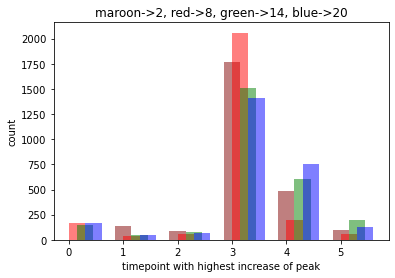

In [221]:
# draw
unique_counts = np.unique(arr_max_index_per_trans_2)
x_2 = []
y_2 = []
for i in range(len(unique_counts)):
    x_2.append(unique_counts[i])
    count = arr_max_index_per_trans_2.count(unique_counts[i])
    y_2.append(count)

unique_counts = np.unique(arr_max_index_per_trans_8)
x_8 = []
y_8 = []
for i in range(len(unique_counts)):
    x_8.append(unique_counts[i])
    count = arr_max_index_per_trans_8.count(unique_counts[i])
    y_8.append(count)

unique_counts = np.unique(arr_max_index_per_trans_14)
x_14 = []
y_14 = []
for i in range(len(unique_counts)):
    x_14.append(unique_counts[i])
    count = arr_max_index_per_trans_14.count(unique_counts[i])
    y_14.append(count)

unique_counts = np.unique(arr_max_index_per_trans_20)
x_20 = []
y_20 = []
for i in range(len(unique_counts)):
    x_20.append(unique_counts[i])
    count = arr_max_index_per_trans_20.count(unique_counts[i])
    y_20.append(count)
    
alpha=0.5
plt.bar(x_2, y_2, color ='maroon', width = 0.3, alpha=alpha)
plt.bar(np.array(x_8)+0.15, y_8, color ='red', width = 0.3,alpha=alpha)
plt.bar(np.array(x_14)+0.3, y_14, color ='green', width = 0.3,alpha=alpha)
plt.bar(np.array(x_14)+0.45, y_20, color ='blue', width = 0.3,alpha=alpha)
    
plt.xlabel("timepoint with highest increase of peak")
plt.ylabel("count")
plt.title("maroon->2, red->8, green->14, blue->20")
plt.show()


df_0_conc.shape:(5908, 29)


5908

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
5,1030,0.0,9414,A06,1.2,13.7,6.3,80.9,123.4,85.9,31.6,1.5,3.2,38.7,30.3,66.4,10.0,0.0,3.6,23.2,84.3,123.1,55.2,27.9,0.0,0.0,10.6,47.5,1030_0.0
10,1030,0.0,9414,A12,12.2,4.9,8.6,57.4,46.4,7.9,23.1,1.8,0.0,74.1,33.8,40.4,14.3,0.0,0.0,22.3,21.7,27.0,0.7,1.0,0.0,0.0,53.2,0.0,1030_0.0
16,1030,0.0,9414,B06,3.2,0.0,0.0,80.5,96.8,140.6,0.0,0.0,25.8,83.4,93.6,78.9,44.5,0.0,10.8,21.2,144.4,78.7,33.4,0.0,0.0,0.0,53.2,98.4,1030_0.0
22,1030,0.0,9414,B12,0.0,0.0,0.0,26.7,44.4,30.1,24.2,0.0,0.0,44.5,0.0,22.5,1.9,8.7,0.0,26.2,8.4,36.8,23.7,9.5,5.5,21.0,0.0,0.0,1030_0.0
28,1030,0.0,9414,C06,12.4,34.5,96.5,136.5,148.6,36.8,9.6,0.0,5.1,15.3,11.8,16.5,22.1,0.0,0.0,7.0,25.3,9.6,0.9,15.8,0.4,11.2,8.3,1.7,1030_0.0
34,1030,0.0,9414,C12,1.6,17.5,4.6,0.0,0.0,0.0,13.6,0.9,19.6,17.2,0.0,0.0,1.1,0.0,0.9,0.0,0.0,0.0,0.0,0.0,10.6,1.6,22.6,0.0,1030_0.0
40,1030,0.0,9414,D06,0.0,5.5,2.9,17.0,0.0,0.0,0.3,0.0,0.0,19.9,2.1,0.0,4.8,0.0,1.8,15.1,9.7,0.0,0.0,5.8,11.1,0.0,49.8,0.0,1030_0.0
46,1030,0.0,9414,D12,0.0,1.3,0.0,21.4,5.5,2.0,0.0,0.0,0.0,53.2,0.0,0.0,0.0,0.0,3.2,2.7,5.2,3.4,0.0,4.7,6.3,0.0,34.0,0.0,1030_0.0
57,1030,0.0,9414,E12,0.0,1.3,0.0,143.6,145.9,141.6,44.0,0.0,0.0,122.7,139.9,128.5,66.0,0.0,0.0,6.5,103.3,99.7,54.7,38.5,0.0,0.0,49.0,93.8,1030_0.0
63,1030,0.0,9414,F06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_0.0


/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/3_bmd_feasibility_BMD/latest_most_targets/LPR
df_lpr_min_0_conc.png


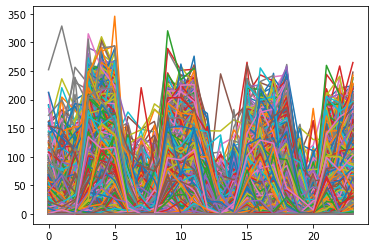

In [161]:
# 0 concentration

time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

#df_part_0_conc = df_lpr_min_part.loc[df_lpr_min_part['conc'] == 0]
df_0_conc = df_lpr_min.loc[df_lpr_min['conc'] == 0]

print ("df_0_conc.shape:" + str(df_0_conc.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

#ax.plot(np.transpose(df_0_conc.iloc[10:223,time_index_start:time_index_start + num_time_points].values));
ax.plot(np.transpose(df_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));
display(len(df_0_conc))
display(df_0_conc.head(10))

complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_0_conc.png"
cwd = os.getcwd()
print (cwd)
print (output_filename)
plt.savefig(output_filename, bbox_inches="tight")

In [163]:
if 'chemical_conc' in df_0_conc.columns:
    df_0_conc = df_0_conc.drop(columns='chemical_conc')
    
if 'chemical_conc_plate' in df_0_conc.columns:
    df_0_conc = df_0_conc.drop(columns='chemical_conc_plate')

In [187]:
## identify biggest change of peaks in each ccp
#0-5,
#6-11,
#12-17,
#18-23
trans_points = [2,8,14,20] # "official"

df_0_conc_ccp = df_0_conc.copy()
df_0_conc_ccp.insert(0, 'chemical_conc_plate', df_0_conc.loc[:,['chemical.id','conc','plate.id']].apply(lambda x: '_'.join(x.map(str)), axis = 1))
display(df_0_conc_ccp.head())

f_out = open("report.txt","w+")
arr_max_index_per_trans_2 = []
arr_max_index_per_trans_8 = []
arr_max_index_per_trans_14 = []
arr_max_index_per_trans_20 = []

for ccp in np.unique(df_0_conc_ccp.chemical_conc_plate):
    #print (str(ccp))
    per_ccp = df_0_conc_ccp.loc[df_0_conc_ccp.chemical_conc_plate == ccp,:]
    #display(per_ccp.head())
    #display(len(per_ccp))
    #display(per_ccp.tail())
    
    former_timepoints_mean = 999
    for trans_index, trans_point in enumerate(trans_points):
        arr_diff = []
        #print ("trans_point:" + str(trans_point))
        for i in range (-2, 4):
            current_timepoint = 't' + str(trans_point+i)
            values = per_ccp[current_timepoint]
            diff = values.mean() - former_timepoints_mean
            arr_diff.append(diff)
            former_timepoints_mean = values.mean()
        max_value = max(arr_diff)
        max_index = arr_diff.index(max_value)
        #print (max_index)
        unique_ccp = np.unique(per_ccp['chemical_conc_plate'])
        save_this = unique_ccp[0]
        save_this = save_this + " trans_point: " + str(trans_point) + " " + str(max_index) + "\n"
        f_out.write(save_this)
        if (trans_point == 2):
            arr_max_index_per_trans_2.append(max_index)
        elif (trans_point == 8):
             arr_max_index_per_trans_8.append(max_index)
        elif (trans_point == 14):
            arr_max_index_per_trans_14.append(max_index)
        else: # (trans_point == 20):
            arr_max_index_per_trans_20.append(max_index)
        
f_out.close()
print ("analysis done")


,chemical_conc_plate,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23
5,1030.0_0.0_9414.0,1030,0.0,9414,A06,1.2,13.7,6.3,80.9,123.4,85.9,31.6,1.5,3.2,38.7,30.3,66.4,10.0,0.0,3.6,23.2,84.3,123.1,55.2,27.9,0.0,0.0,10.6,47.5
10,1030.0_0.0_9414.0,1030,0.0,9414,A12,12.2,4.9,8.6,57.4,46.4,7.9,23.1,1.8,0.0,74.1,33.8,40.4,14.3,0.0,0.0,22.3,21.7,27.0,0.7,1.0,0.0,0.0,53.2,0.0
16,1030.0_0.0_9414.0,1030,0.0,9414,B06,3.2,0.0,0.0,80.5,96.8,140.6,0.0,0.0,25.8,83.4,93.6,78.9,44.5,0.0,10.8,21.2,144.4,78.7,33.4,0.0,0.0,0.0,53.2,98.4
22,1030.0_0.0_9414.0,1030,0.0,9414,B12,0.0,0.0,0.0,26.7,44.4,30.1,24.2,0.0,0.0,44.5,0.0,22.5,1.9,8.7,0.0,26.2,8.4,36.8,23.7,9.5,5.5,21.0,0.0,0.0
28,1030.0_0.0_9414.0,1030,0.0,9414,C06,12.4,34.5,96.5,136.5,148.6,36.8,9.6,0.0,5.1,15.3,11.8,16.5,22.1,0.0,0.0,7.0,25.3,9.6,0.9,15.8,0.4,11.2,8.3,1.7


analysis done


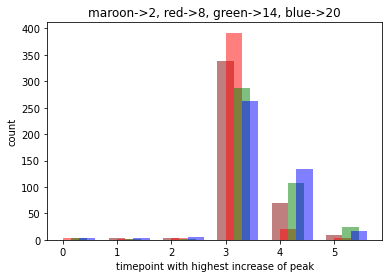

In [218]:
# draw
unique_counts = np.unique(arr_max_index_per_trans_2)
x_2 = []
y_2 = []
for i in range(len(unique_counts)):
    x_2.append(unique_counts[i])
    count = arr_max_index_per_trans_2.count(unique_counts[i])
    y_2.append(count)

unique_counts = np.unique(arr_max_index_per_trans_8)
x_8 = []
y_8 = []
for i in range(len(unique_counts)):
    x_8.append(unique_counts[i])
    count = arr_max_index_per_trans_8.count(unique_counts[i])
    y_8.append(count)

unique_counts = np.unique(arr_max_index_per_trans_14)
x_14 = []
y_14 = []
for i in range(len(unique_counts)):
    x_14.append(unique_counts[i])
    count = arr_max_index_per_trans_14.count(unique_counts[i])
    y_14.append(count)

unique_counts = np.unique(arr_max_index_per_trans_20)
x_20 = []
y_20 = []
for i in range(len(unique_counts)):
    x_20.append(unique_counts[i])
    count = arr_max_index_per_trans_20.count(unique_counts[i])
    y_20.append(count)
    
alpha=0.5
plt.bar(x_2, y_2, color ='maroon', width = 0.3, alpha=alpha)
plt.bar(np.array(x_8)+0.15, y_8, color ='red', width = 0.3,alpha=alpha)
plt.bar(np.array(x_14)+0.3, y_14, color ='green', width = 0.3,alpha=alpha)
plt.bar(np.array(x_14)+0.45, y_20, color ='blue', width = 0.3,alpha=alpha)
    
plt.xlabel("timepoint with highest increase of peak")
plt.ylabel("count")
plt.title("maroon->2, red->8, green->14, blue->20")
plt.show()


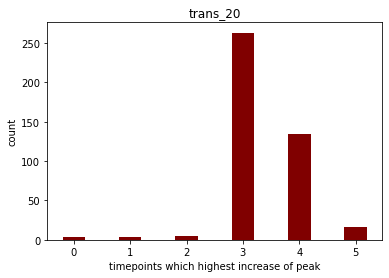

In [208]:


plt.bar(x, y, color ='maroon', width = 0.4)
 
plt.xlabel("timepoints which highest increase of peak")
plt.ylabel("count")
plt.title("trans_20")
plt.show()


ValueError: The number of FixedLocator locations (425), usually from a call to set_ticks, does not match the number of ticklabels (3).

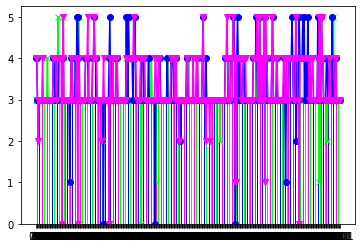

In [203]:
# fig, is the whole thing; ax1 is a subplot in the figure, 
# so we reference it to plot bars and lines there
fig, ax1 = plt.subplots()

ind = np.arange(len(arr_max_index_per_trans_20))
#width = 0.15

# per dimension
colors = ['#00ff00', '#0000ff', '#ff00ff']
markers = ['x','o','v']
#xticklabels = ['50/50', '60/40', '70/30']

#
all_groups = [ arr_max_index_per_trans_8, arr_max_index_per_trans_14, arr_max_index_per_trans_20 ]

# plot each group of bars; loop-variable bar_values contains values for bars
for i, bar_values in enumerate( all_groups ):

  # compute position for each bar
  bar_position = width*i
  ax1.bar( ind + bar_position, bar_values, width, color=colors[i] )

# plot line for each group of bars; loop-variable y_values contains values for lines
for i, y_values in enumerate( all_groups ):

  # moves the beginning of a line to the middle of the bar
  additional_space = (width*i) + (width/2);
  # x_values contains list indices plus additional space
  x_values = [ x + additional_space for x,_ in enumerate( y_values ) ]

  # simply plot the values in y_values
  ax1.plot( x_values, y_values, marker=markers[i], color=colors[i] )

plt.setp([ax1], xticks=ind + width, xticklabels=xticklabels)

plt.tight_layout()
plt.show()

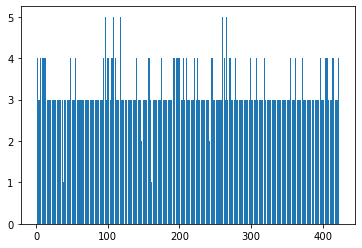

In [191]:
plt.bar(np.arange(len(arr_max_index_per_trans_2)),arr_max_index_per_trans_2)
plt.show()

In [188]:
np.savetxt("arr_max_index_per_trans_2.csv", arr_max_index_per_trans_2, delimiter=",")
np.savetxt("arr_max_index_per_trans_8.csv", arr_max_index_per_trans_8, delimiter=",")
np.savetxt("arr_max_index_per_trans_14.csv", arr_max_index_per_trans_14, delimiter=",")
np.savetxt("arr_max_index_per_trans_20.csv", arr_max_index_per_trans_20, delimiter=",")

In [159]:
display(len(np.unique(df_lpr_min['chemical.id'])))
display(np.unique(df_lpr_min['chemical.id']))

186

array([  53,   54,   56,   57,   58,   60,   61,   62,   63,   64,   65,
         66,   67,   69,   70,  129,  155,  220,  227,  246,  247,  248,
        250,  251,  252,  281,  283,  285,  286,  295,  296,  297,  360,
        365,  381,  384,  392,  404,  406,  409,  412,  414,  415,  416,
        417,  418,  419,  420,  441,  447,  448,  500,  501,  502,  503,
        504,  511,  512,  513,  514,  515,  517,  596,  597,  601,  602,
        609,  618,  628,  629,  667,  674,  689,  691,  694,  696,  697,
        721,  722,  741,  746,  747,  768,  769,  770,  771,  774,  775,
        776,  777,  778,  946,  947,  948,  949,  952,  961,  965,  966,
        998, 1030, 1031, 1105, 1114, 1161, 1163, 1166, 1171, 1172, 1174,
       1175, 1176, 1177, 1178, 1179, 1180, 1182, 1211, 1221, 1307, 1316,
       1354, 1370, 1371, 1449, 1595, 1603, 1610, 1611, 1612, 1613, 1614,
       1615, 1617, 1618, 1620, 1629, 1651, 1670, 1770, 1854, 1855, 1861,
       1930, 1965, 1967, 2058, 2067, 2142, 2323, 23

df_lpr_min_part.shape:(187, 29)


187

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,1030,50.0,9414,A01,0.0,0.0,0.0,84.5,121.3,119.1,0.0,0.0,1.4,103.2,96.9,82.9,28.4,0.0,0.0,17.3,26.1,53.8,50.4,8.6,0.0,1.8,37.1,0.0,1030_50.0
1,1030,35.6,9414,A02,1.2,3.0,0.0,162.1,158.4,181.6,46.2,0.0,0.0,42.4,122.9,145.8,94.5,0.0,5.3,37.1,121.3,153.6,203.2,24.1,2.1,0.0,38.5,112.3,1030_35.6
2,1030,11.2,9414,A03,0.0,0.0,0.0,42.8,82.6,63.8,7.5,0.0,40.6,20.3,45.0,58.3,28.2,0.0,43.9,0.0,12.3,67.7,84.2,22.2,0.0,15.2,60.4,54.1,1030_11.2
3,1030,5.0,9414,A04,2.7,1.8,6.3,17.4,41.7,9.4,1.7,0.0,2.2,16.3,0.9,20.5,8.8,0.0,0.0,22.2,11.7,43.3,153.7,16.6,0.0,0.0,21.8,0.0,1030_5.0
4,1030,1.0,9414,A05,3.0,1.3,4.5,168.8,214.3,154.0,10.4,2.9,6.5,128.0,173.5,178.3,90.8,0.0,10.3,40.0,26.9,153.1,112.4,38.9,1.0,4.7,67.4,134.6,1030_1.0
5,1030,0.0,9414,A06,1.2,13.7,6.3,80.9,123.4,85.9,31.6,1.5,3.2,38.7,30.3,66.4,10.0,0.0,3.6,23.2,84.3,123.1,55.2,27.9,0.0,0.0,10.6,47.5,1030_0.0
6,1030,35.6,9414,A08,0.0,0.0,2.4,47.3,33.7,15.0,0.0,0.0,0.0,56.5,5.5,25.6,24.0,0.0,0.0,34.6,1.9,3.9,0.0,0.0,0.6,0.0,3.8,0.4,1030_35.6
7,1030,11.2,9414,A09,3.6,0.0,0.0,93.5,23.4,25.9,35.0,0.0,2.2,54.3,44.0,71.9,12.1,0.0,6.6,26.0,27.6,26.0,30.9,5.9,0.0,0.0,27.2,59.4,1030_11.2
8,1030,5.0,9414,A10,2.6,16.2,17.5,46.3,79.2,159.7,58.7,30.0,13.7,109.0,149.7,115.7,79.0,43.4,22.7,0.0,0.0,12.3,8.9,29.6,22.0,19.8,8.4,21.8,1030_5.0
9,1030,1.0,9414,A11,2.2,5.1,11.0,40.0,0.0,2.7,1.5,0.4,2.8,0.0,0.0,0.0,2.2,0.4,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1030_1.0


/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/3_bmd_feasibility_BMD/latest_most_targets/LPR
df_lpr_min_all_conc.png


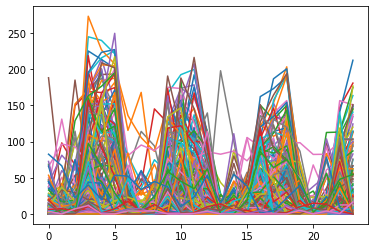

In [52]:
# Plot few lpr curves to check transition points
# all concentrations
time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

#print ("df_lpr_min.shape:" + str(df_lpr_min.shape))
print ("df_lpr_min_part.shape:" + str(df_lpr_min_part.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

#ax.plot(np.transpose(df_lpr_min.iloc[10:223,time_index_start:time_index_start + num_time_points].values));
ax.plot(np.transpose(df_lpr_min_part.iloc[:,time_index_start:time_index_start + num_time_points].values));
#ax.plot(np.transpose(df_lpr_min_part.iloc[:,time_index_start:time_index_start+5].values));
display(len(df_lpr_min_part))
display(df_lpr_min_part.head(10))

complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_all_conc.png"
cwd = os.getcwd()
print (cwd)
print (output_filename)
plt.savefig(output_filename, bbox_inches="tight")

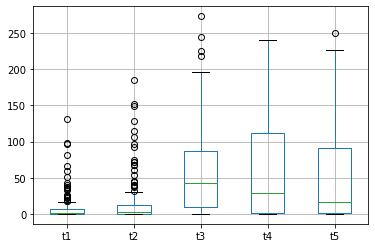

In [48]:
fig, ax = plt.subplots()
boxplot = df_lpr_min_part.boxplot(column=['t1', 't2', 't3', 't4', 't5'])

In [82]:
df_lpr_min_part.to_csv("df_lpr_min_part.csv", index=False)
display(df_lpr_min_part.head())
display(df_lpr_min_part.tail())

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,1030,50.0,9414,A01,0.0,0.0,0.0,84.5,121.3,119.1,0.0,0.0,1.4,103.2,96.9,82.9,28.4,0.0,0.0,17.3,26.1,53.8,50.4,8.6,0.0,1.8,37.1,0.0,1030_50.0
1,1030,35.6,9414,A02,1.2,3.0,0.0,162.1,158.4,181.6,46.2,0.0,0.0,42.4,122.9,145.8,94.5,0.0,5.3,37.1,121.3,153.6,203.2,24.1,2.1,0.0,38.5,112.3,1030_35.6
2,1030,11.2,9414,A03,0.0,0.0,0.0,42.8,82.6,63.8,7.5,0.0,40.6,20.3,45.0,58.3,28.2,0.0,43.9,0.0,12.3,67.7,84.2,22.2,0.0,15.2,60.4,54.1,1030_11.2
3,1030,5.0,9414,A04,2.7,1.8,6.3,17.4,41.7,9.4,1.7,0.0,2.2,16.3,0.9,20.5,8.8,0.0,0.0,22.2,11.7,43.3,153.7,16.6,0.0,0.0,21.8,0.0,1030_5.0
4,1030,1.0,9414,A05,3.0,1.3,4.5,168.8,214.3,154.0,10.4,2.9,6.5,128.0,173.5,178.3,90.8,0.0,10.3,40.0,26.9,153.1,112.4,38.9,1.0,4.7,67.4,134.6,1030_1.0


,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
182,1030,35.6,9509,H08,0.0,5.9,1.3,97.6,66.1,28.9,3.6,6.2,24.1,58.8,45.1,34.9,62.3,0.0,0.0,19.3,86.1,64.0,75.5,47.4,2.8,16.3,47.8,54.6,1030_35.6
183,1030,11.2,9509,H09,6.1,7.3,4.0,10.2,1.4,7.1,17.3,3.2,13.0,1.7,1.0,1.9,9.9,14.0,5.8,5.0,0.0,0.0,2.0,10.0,14.9,13.4,3.6,0.0,1030_11.2
184,1030,5.0,9509,H10,0.0,0.1,1.1,5.8,1.6,2.2,6.6,7.4,0.0,1.0,1.8,0.5,2.4,0.2,6.1,0.4,4.7,0.0,11.8,3.7,0.0,1.9,0.0,16.1,1030_5.0
185,1030,1.0,9509,H11,13.9,0.0,0.4,14.9,0.0,2.1,0.0,0.0,1.7,35.1,2.1,0.6,7.3,5.0,12.2,0.0,0.3,0.0,0.9,0.0,8.2,5.8,94.0,0.0,1030_1.0
186,1030,0.0,9509,H12,3.5,0.0,7.0,11.6,0.0,0.0,4.1,3.8,4.4,0.0,0.0,0.6,3.9,0.0,0.0,0.0,0.0,0.0,0.0,5.1,0.0,4.0,0.6,16.5,1030_0.0


In [ ]:
## identify biggest peaks in each well
#0-5,
#6-11,
#12-17,
#18-23

trans_points = [2,8,14,20] # "official"

df_lpr_min_part_file = open ("df_lpr_min_part.csv") 
df_lpr_min_part_file_lines = df_lpr_min_part_file.readlines()
line_num = -1
arr_t_of_biggest_peak = []
for line in df_lpr_min_part_file_lines:
    #print ("\nline_num:"+str(line_num))

    splited_line = line.split(',')
    
    if (splited_line[0] == "chemical.id"):
        line_num += 1
        continue
    else:
        for trans_index, trans_point in enumerate(trans_points):
            #print ("trans_point:" + str(trans_point))
            biggest_peak = -99
            for i in range (-2, 4):
                current_timepoint = 't' + str(trans_point+i)
                #print (current_timepoint)
                values = df_lpr_min_part[current_timepoint]
                #print (values[line_num])
                if (float(values[line_num]) > biggest_peak):
                    biggest_peak = float(values[line_num])
                    t_of_biggest_peak = current_timepoint
            arr_t_of_biggest_peak.append(t_of_biggest_peak)
        line_num += 1

print (len(arr_t_of_biggest_peak))
print (arr_t_of_biggest_peak)

print (len(np.unique(arr_t_of_biggest_peak)))
print (np.unique(arr_t_of_biggest_peak))

In [51]:
## calculate MOV, AUC for all chemical concentrations

delta = df_lpr_min_part[['chemical.id', 'conc', 'plate.id', 'well']].copy()
#delta -> delta_mov_auc

trans_points = [2,8,14,20] # "official"

end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
#    print ("\ntrans_index:" + str(trans_index))
    print ("trans_point:" + str(trans_point))
    
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta['MOV' + str(trans_index + 1)] = df_lpr_min_part['t' + str(trans_point + 1)] - df_lpr_min_part['t' + str(trans_point)]
        else:
            delta['AUC' + str(trans_index + 1)] \
            = sum(df_lpr_min_part['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(df_lpr_min_part['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))
        
display(delta.head(1))
delta.to_csv("delta_mov_auc.csv", index=False)

trans_point:2
trans_point:8
trans_point:14
trans_point:20


,chemical.id,conc,plate.id,well,MOV1,AUC1,MOV2,AUC2,MOV3,AUC3,MOV4,AUC4
0,1030,50.0,9414,A01,84.5,324.9,101.8,281.6,17.3,68.8,1.8,-20.1


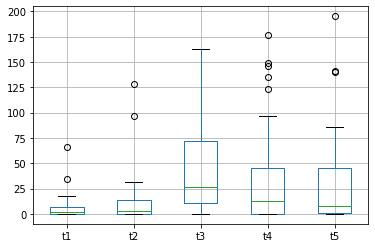

In [47]:
fig, ax = plt.subplots()
boxplot = df_lpr_min_part_0_conc.boxplot(column=['t1', 't2', 't3', 't4', 't5'])
#boxplot = lpr_min_0_conc.boxplot(column=['t13', 't14', 't15', 't16', 't17'])

In [ ]:
## calculate MOV, AUC for 0 chemical concentration only

delta_0_conc = lpr_min_0_conc[['chemical.id', 'conc', 'plate.id', 'well']].copy()
#'delta' was 'delta_mov_auc'

trans_points = [2,8,14,20] # "official"
#trans_points = [2,8,15,21]
end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta_0_conc['MOV' + str(trans_index + 1)] \
            = lpr_min['t' + str(trans_point + 1)] \
            - lpr_min['t' + str(trans_point)]
        else:
            delta_0_conc['AUC' + str(trans_index + 1)] \
            = sum(lpr_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(lpr_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))
        
display(delta_0_conc.head(1))
delta_0_conc.to_csv("delta_mov_auc_0_conc.csv", index=False)

In [ ]:
######## investigate whether AUC4 is negative

AUC1_mean_neg = AUC1_mean_pos = AUC2_mean_neg = AUC2_mean_pos = 0
AUC3_mean_neg = AUC3_mean_pos = AUC4_mean_neg = AUC4_mean_pos = 0

unique_chemical_id_s = np.unique(delta_0_conc['chemical.id'])
print (len(unique_chemical_id_s))
for i in range(len(unique_chemical_id_s)):
    chemical_id = unique_chemical_id_s[i]
    #if (chemical_id != 414):
    #    continue
    #print ("\n", chemical_id)
    per_chemical = delta_0_conc.loc[delta_0_conc['chemical.id'] == chemical_id]
    #display(per_chemical)
    #display(per_chemical["AUC4"].mean())

    AUC1_mean = float(per_chemical["AUC1"].mean())
    if (AUC1_mean) < 0:
        AUC1_mean_neg += 1
    else:
        AUC1_mean_pos += 1
            
    AUC2_mean = float(per_chemical["AUC2"].mean())
    if (AUC2_mean) < 0:
        AUC2_mean_neg += 1
    else:
        AUC2_mean_pos += 1
        
    AUC3_mean = float(per_chemical["AUC3"].mean())
    if (AUC3_mean) < 0:
        AUC3_mean_neg += 1
    else:
        AUC3_mean_pos += 1

    AUC4_mean = float(per_chemical["AUC4"].mean())
    if (AUC4_mean) < 0:
        AUC4_mean_neg += 1
    else:
        AUC4_mean_pos += 1

display(AUC1_mean_pos) # 100
display(AUC1_mean_neg) # 1

display(AUC2_mean_pos) # 100
display(AUC2_mean_neg) # 1

display(AUC3_mean_pos) # 100
display(AUC3_mean_neg) # 1

display(AUC4_mean_pos) # 62
display(AUC4_mean_neg) # 39
#display(AUC4_df.head())

In [11]:
display("before dropna, len(df_lpr_filtered):"+str(len(df_lpr_filtered)))
df_lpr_filtered_no_na = df_lpr_filtered.dropna(how='any')
display("after dropna,  len(df_lpr_filtered_no_na):"+str(len(df_lpr_filtered_no_na)))

is_NaN = df_lpr_filtered.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_lpr_filtered[row_has_NaN]

display(rows_with_NaN.head())
display(len(rows_with_NaN))

'before dropna, len(df_lpr_filtered):33570'

'after dropna,  len(df_lpr_filtered_no_na):22231'

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124,t125,t126,t127,t128,t129,t130,t131,t132,t133,t134,t135,t136,t137,t138,t139,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200,t201,t202,t203,t204,t205,t206,t207,t208,t209,t210,t211,t212,t213,t214,t215,t216,t217,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,1030,9414,A01,1030_9414.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,25.7,26.7,0.0,0.0,0.0,11.2,0.0,0.0,20.9,3.3,0.0,5.1,21.5,36.3,0.0,0.0,10.3,25.2,19.6,21.7,22.6,6.2,0.0,2.5,2.8,23.0,6.6,13.9,19.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.9,37.4,2.6,0.0,0.0,1.2,0.0,24.1,25.7,14.6,26.0,4.4,1.2,5.1,4.5,NaN,0.0,15.4,15.5,0.0,0.0,NaN,5.9,26.2,19.9,0.0,0.0,15.4,12.7,13.7,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,NaN,0.0,0.0,16.8,NaN,16.7,0.0,0.0,0.0,2.9,0.0,0.0,0.0,NaN,6.5,16.7,0.0,5.1,29.8,0.0,0.0,0.0,NaN,2.2,0.0,4.9,14.1,0.0,0.0,0.0,0.0,0.0,0.0,1.8,29.6,1.0,7.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.0,0.0,22.0,15.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_9414_A01
1,1030,9414,A02,1030_9414.0_A02,35.6,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,1.3,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,33.8,22.7,17.2,3.7,8.3,21.1,15.5,18.0,21.8,11.6,6.5,20.3,24.1,16.1,8.7,20.0,18.5,23.4,9.2,12.2,20.6,21.8,22.3,18.2,14.4,11.0,18.3,20.9,21.9,18.9,16.3,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.8,17.3,4.3,0.0,0.0,0.0,0.0,0.0,4.5,15.4,9.4,11.5,12.0,17.9,18.0,NaN,16.5,17.7,17.8,13.1,7.8,NaN,16.0,13.2,24.8,19.3,20.3,13.5,22.9,19.6,NaN,19.8,18.3,12.7,1.2,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3,11.3,NaN,0.0,0.0,24.5,NaN,15.4,12.1,0.9,2.0,16.4,20.1,16.4,13.9,NaN,24.1,14.7,11.3,15.9,16.3,13.9,14.5,23.9,NaN,22.8,20.3,18.6,20.4,18.3,18.7,21.8,21.1,22.5,14.9,18.9,28.0,15.8,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.3,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,24.2,9.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.1,12.7,16.3,11.7,13.9,16.0,20.0,18.6,1030_9414_A02
2,1030,9414,A03,1030_9414.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,14.3,0.0,0.0,0.0,0.0,0.0,3.4,10.4,14.7,4.0,11.4,9.8,8.1,7.9,7.9,7.7,7.9,14.0,3.9,1.7,4.1,12.4,6.0,5.0,10.5,7.0,4.5,6.8,5.8,7.1,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,3.0,34.9,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,9.0,10.7,12.2,3.0,0.0,0.0,0.0,8.1,8.0,NaN,6.0,7.7,0.0,5.7,6.9,NaN,3.5,4.0,7.5,9.8,11.3,9.6,7.2,2.9,NaN,10.6,7.5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,36.7,3.6,0.2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0

11339

In [12]:
#df_lpr.to_csv("df_lpr_cpw_added.csv",index=False)
df_lpr_filtered.to_csv("df_lpr_filtered_cpw_added.csv",index=False)

In [13]:
display(df_lpr_filtered_no_na.head())

print ("df_lpr_filtered_no_na.shape:" + str(df_lpr_filtered_no_na.shape))
#(8160610, 7)

#display(len(lpr_filtered_data))
#lpr_filtered_data.to_csv("lpr_filtered_data.csv",index=False)

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124,t125,t126,t127,t128,t129,t130,t131,t132,t133,t134,t135,t136,t137,t138,t139,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200,t201,t202,t203,t204,t205,t206,t207,t208,t209,t210,t211,t212,t213,t214,t215,t216,t217,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
192,1031,13522,A01,1031_13522.0_A01,50.0,19.523,13.706,2.196,0.000,12.619,16.416,15.425,13.257,0.0,0.000,0.420,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.00,0.000,0.000,0.000,0.0,0.000,16.749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,14.89,69.428,6.816,0.0,0.0,0.0,0.0,0.0,5.42,0.0,0.0,0.0,0.0,0.0,0.0,22.244,1.159,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.0,22.233,15.164,3.799,0.000,0.0,0.0,0.0,0.0,9.473,20.453,10.098,21.146,5.271,0.829,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,12.685,1.353,20.770,0.415,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,10.699,14.520,2.576,0.0,0.174,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.551,0.0,0.0,0.00,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,8.423,41.645,12.112,0.000,0.0,0.000,15.426,5.408,0.697,9.655,15.344,1.723,0.0,0.0,14.540,12.119,13.515,10.271,9.796,18.018,23.12,18.652,11.351,4.606,16.582,13.537,18.984,13.680,18.871,15.687,9.172,16.607,13.951,22.262,9.135,14.572,11.551,0.415,1.246,8.556,14.134,19.201,30.299,20.82,1031_13522_A01
194,1031,13522,A03,1031_13522.0_A03,11.2,0.779,3.014,17.207,11.661,0.699,9.886,11.614,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.00,0.000,0.000,0.971,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,37.535,29.077,7.437,0.536,0.000,0.000,0.000,0.0,0.000,6.147,0.000,0.0,0.0,0.431,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,20.651,2.027,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,20.363,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,2.170,3.511,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,7.838,21.523,4.73,3.728,0.00,0.000,0.000,0.0,0.0,0.00,0.000,0.0,0.0,0.000,0.0,0.000,1.809,0.793,0.0,0.000,0.000,0.000,0.000,0.0,0.000,2.603,0.426,0.000,0.000,0.335,0.000,0.0,0.0,24.841,13.464,2.120,0.000,0.000,0.000,0.00,0.000,0.000,25.558,16.575,14.336,18.005,0.624,0.647,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,1031_13522_A03
195,1031,13522,A04,1031_13522.0_A04,5.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,1.009,0.968,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,

df_lpr_filtered_no_na.shape:(22231, 246)


In [18]:
# skip this
"(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239"

# (L0,D0) 
# T1 - T60 --> 360 seconds -> 6 minutes

# (L1,D1) 
# T61 - T120 --> 360 seconds -> 6 minutes

# (L2,D2) 
# T121 - T180 --> 360 seconds -> 6 minutes

# (L3,D3) 
# T181 - T240 --> 360 seconds -> 6 minutes

'(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239'

In [ ]:
# calculate new decreasing endpoints
delta_mov_auc_w_decreasing = delta_mov_auc.copy()
for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    for just_index, end_point in enumerate(end_points):
        ori = str(end_point) + str(transition_index + 1)
        #print ("\nori:" + str(ori))
        #print ("delta_mov_auc_w_decreasing[ori]:\n" + str(delta_mov_auc_w_decreasing[ori]))
        
        for new_index in range(len(transition_points)-1):
            final_index = transition_index + new_index
            new = str(end_point) + str(final_index+2)
            #print ("new:" + str(new))
            check_whether_new_exists = new in delta_mov_auc_w_decreasing.columns
            #print ("check_whether_new_exists:"+str(check_whether_new_exists))
            if (check_whether_new_exists == False):
                continue
            name = str(end_point) + str(transition_index + 1) + "_" + str(new)
            print ("name:" + str(name))
            delta_mov_auc_w_decreasing[name] \
                = delta_mov_auc_w_decreasing[ori] - delta_mov_auc_w_decreasing[new]
display (delta_mov_auc_w_decreasing.head(1))

In [ ]:
# calculate final decreasing endpoints
delta_mov_auc_w_decreasing_copied = delta_mov_auc_w_decreasing.copy()
delta_mov_auc_final = delta_mov_auc_w_decreasing.copy()
columns_to_keep = []
for just_index, end_point in enumerate(end_points):
    for (columnName, columnData) in delta_mov_auc_w_decreasing_copied.iteritems():
        if "_" not in columnName:
            continue
        if str(end_point) not in columnName:
            continue
#        print('Colunm Name : ', columnName)
        columns_to_keep.append(columnName)

    delta_mov_auc_w_decreasing_copied_select = delta_mov_auc_w_decreasing_copied.loc[:,columns_to_keep]
    
    # "axis 0” represents rows
    # "axis 1” represents columns

    all_ = delta_mov_auc_w_decreasing_copied_select.sum(axis=1)
   # print ("all_:\n" + str(all_))
    
    final_endpoint_name = str(end_point) + "_all_" 
    delta_mov_auc_final.insert(0, final_endpoint_name, all_)
    

display("delta_mov_auc_final.head():", delta_mov_auc_final.head())
    
delta_mov_auc_final.to_csv("delta_mov_auc_final.csv",index=False)
    

In [ ]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())
#display(delta_mov_auc.tail())

In [ ]:
import generate_dose_response as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [ ]:
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
    end_points_from_here = ['MOV1','AUC1']
else:
    chemical_id_from_here = [53]
    end_points_from_here = ['MOV1']

#report = True
report = False

for chemical_id in chemical_id_from_here:
    if (report): print("chemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        if (report): print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        #print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        #print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        #print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# 7 chemicals and 2 endpoints (['MOV1','AUC1']), 6 minutes took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()